In [ ]:
import pandas as pd
import os
import numpy as np
import cv2
from keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
import keras
from keras.layers import Conv2D,Activation,MaxPooling2D
#import keras_utils
from keras.layers import Concatenate
from keras import Input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras import models
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix,  plot_confusion_matrix,  ConfusionMatrixDisplay

In [ ]:
data_path='/content/drive/MyDrive/covid-end'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(labels)
print(label_dict)
print(categories)
print(labels)

[0, 1]
{'neg': 0, 'pos': 1}
['neg', 'pos']
[0, 1]


In [ ]:
img_size=100
data=[]
target=[]
count=0

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        count+=1

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            print(count,img_name)
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

Streaming output truncated to the last 5000 lines.
16781 إيجابي_original_COVID (1161).png_48d997c7-b337-422b-a87c-332e980b7a52.png
16782 إيجابي_original_COVID (1051).png_ae07b80e-edd3-4a42-81d3-79158642e237.png
16783 إيجابي_original_COVID (1031).png_c15fbb3c-88d3-42fb-9b2d-e037fa8c3b1c.png
16784 إيجابي_original_COVID-19 (609).jpg_fa0a51f4-dd18-439e-8600-c90c6f52e55c.jpg
16785 إيجابي_original_COVID (29).png_19d30995-70a7-4eec-8450-c1033ca85209.png
16786 إيجابي_original_COVID-19 (203).jpg_3c8efd79-0e92-47a3-8dc6-615c94f116a1.jpg
16787 إيجابي_original_COVID-19 (559).jpg_5179b8a8-8c25-4d25-ae2d-35e368f17b53.jpg
16788 إيجابي_original_1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-001-fig2b.png_f1bab627-d0df-463e-a916-99c2005b1f50.png
16789 إيجابي_original_COVID (39).png_efaa3a99-e5ad-4a57-b03e-2a14add5d54f.png
16790 إيجابي_original_COVID (867).png_4fd67d87-d393-4562-950d-1c1b178eb753.png
16791 إيجابي_original_COVID-19 (1169).jpg_741e0e1a-e4ab-499e-84d4-f285e7ae6665.jpg
16792 إيج

In [ ]:
data1 = np.save('/content/drive/MyDrive/data/data.npy', data)
target1= np.save('/content/drive/MyDrive/data/target.npy', target)

In [ ]:
data1 = np.load('/content/drive/MyDrive/data/data.npy')
target1 = np.load('/content/drive/MyDrive/data/target.npy')

In [ ]:
print(data1.shape)
print(data1)

In [ ]:
img_size=100
data=np.array(data1)/255.0
data_end=np.reshape(data1,(data1.shape[0],img_size,img_size,1))
target=np.array(target1)
 
new_target=np_utils.to_categorical(target1)

In [ ]:
print('data' ,target)
print('data_end' , new_target)

data [0 0 0 ... 1 1 1]
data_end [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [ ]:
np.save('/content/drive/MyDrive/data/data1',data_end)
np.save('/content/drive/MyDrive/data/target1',new_target)

In [ ]:
data=np.load('/content/drive/MyDrive/data/data1.npy')
target=np.load('/content/drive/MyDrive/data/target1.npy')
print(data.shape)
print(target.shape)

(21759, 100, 100, 1)
(21759, 2)


In [ ]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)
print('train_data' , train_data.shape)
print('test_data' , test_data.shape)
print('train_data' , train_target.shape)
print('test_data' , test_target.shape)

train_data (17407, 100, 100, 1)
test_data (4352, 100, 100, 1)
train_data (17407, 2)
test_data (4352, 2)


In [ ]:
input_shape=data.shape[1:] #50,50,1
inp=Input(shape=input_shape)
print(input_shape, inp)

(100, 100, 1) KerasTensor(type_spec=TensorSpec(shape=(None, 100, 100, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [ ]:
 convs=[]
 
parrallel_kernels=[3,5,7]
 
for k in range(len(parrallel_kernels)):
 
    conv = Conv2D(128, parrallel_kernels[k],padding='same',activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)
    print(k,conv)

0 KerasTensor(type_spec=TensorSpec(shape=(None, 100, 100, 128), dtype=tf.float32, name=None), name='conv2d_3/Relu:0', description="created by layer 'conv2d_3'")
1 KerasTensor(type_spec=TensorSpec(shape=(None, 100, 100, 128), dtype=tf.float32, name=None), name='conv2d_4/Relu:0', description="created by layer 'conv2d_4'")
2 KerasTensor(type_spec=TensorSpec(shape=(None, 100, 100, 128), dtype=tf.float32, name=None), name='conv2d_5/Relu:0', description="created by layer 'conv2d_5'")


In [ ]:
out = Concatenate()(convs)
conv_model = Model(inp, out)
print(out)
print(inp)
print(conv_model)

KerasTensor(type_spec=TensorSpec(shape=(None, 100, 100, 384), dtype=tf.float32, name=None), name='concatenate_4/concat:0', description="created by layer 'concatenate_4'")
KerasTensor(type_spec=TensorSpec(shape=(None, 100, 100, 1), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,Dropout
 
model=Sequential()
 
model.add(Conv2D(128 ,(3,3),input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
 
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers
 
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers
 
model.add(Flatten())
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dropout(0.5))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories
 
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 128)       1280      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 128)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        73792     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 32)        1

In [ ]:
# Checkpoint
filepath="/content/drive/MyDrive/data/3layer.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
#checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=90,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/90
436/436 [==============================] - 57s 32ms/step - loss: 0.9081 - accuracy: 0.7404 - val_loss: 0.2844 - val_accuracy: 0.8653
Epoch 2/90
436/436 [==============================] - 13s 30ms/step - loss: 0.3730 - accuracy: 0.8376 - val_loss: 0.2279 - val_accuracy: 0.9092
Epoch 3/90
436/436 [==============================] - 13s 30ms/step - loss: 0.2940 - accuracy: 0.8753 - val_loss: 0.1990 - val_accuracy: 0.9130
Epoch 4/90
436/436 [==============================] - 13s 30ms/step - loss: 0.2585 - accuracy: 0.8919 - val_loss: 0.1968 - val_accuracy: 0.9182
Epoch 5/90
436/436 [==============================] - 13s 30ms/step - loss: 0.2523 - accuracy: 0.8922 - val_loss: 0.1895 - val_accuracy: 0.9207
Epoch 6/90
436/436 [==============================] - 13s 29ms/step - loss: 0.2258 - accuracy: 0.9071 - val_loss: 0.1854 - val_accuracy: 0.9268
Epoch 7/90
436/436 [==============================] - 13s 29ms/step - loss: 0.2100 - accuracy: 0.9134 - val_loss: 0.1808 - val_accuracy:

In [ ]:
 # load the model
new_model = load_model("/content/drive/MyDrive/3layer/3layer.hdf5")
#assert_allclose(model.predict(x_train),
                #new_model.predict(x_train),
               # 1e-5)

In [ ]:
 # Checkpoint
filepath="/content/drive/MyDrive/3layer/3layertext.pd"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
 #checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=new_model.fit(train_data,train_target,epochs=1,callbacks=[checkpoint],validation_split=0.2)

436/436 [==============================] - 57s 31ms/step - loss: 0.1161 - accuracy: 0.9696 - val_loss: 0.0890 - val_accuracy: 0.9747


In [ ]:
 
 
new_model.save('/content/drive/MyDrive/3layer/3layertext.pb', save_format='tf')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/3layer/3layertext.pb/assets


In [ ]:
model.save("/content/drive/MyDrive/data/3layer.hdf5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# fit the model
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
# load the model
new_model = load_model("/content/drive/MyDrive/3layer/3layer.hdf5")
#assert_allclose(model.predict(x_train),
                #new_model.predict(x_train),
               # 1e-5)

In [ ]:
 
checkpoint = ModelCheckpoint('/content/drive/MyDrive/data/weights.best2-{epoch:03}.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history=new_model.fit(train_data,train_target,epochs=70,callbacks=[checkpoint],validation_split=0.2)

In [ ]:
new_model.save("/content/drive/MyDrive/data/weights.best70.hdf5")
print("Saved model to disk")

Saved model to disk


In [ ]:
#target_names = ['neg', 'pos']
#label_names = [0 , 1]
#classes = 2
#Y_pred = model.predict_generator(test_data) 
#y_pred = np.argmax(Y_pred,  axis =1)
 
#cn = confusion_matrix(test_data.classes,  y_pred,  labels = label_names) 
 
#print ('Confusion Matrix') 
#print(confusion_matrix(test_data.classes,  y_pred))
 
#print('Classification_Report') 
#print(classification_report(test_data.classes,  y_pred, target_names = target_names)) 
 
#disp = confusionMatrixDisplay(confusion_matrix = cn,  display_labels = target_names)
#disk = disp.plot(cmap = plt.cn.Blues, values_format ='g') 
#plt.show()

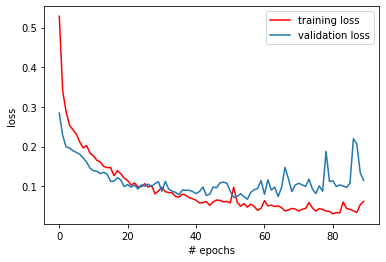

In [ ]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

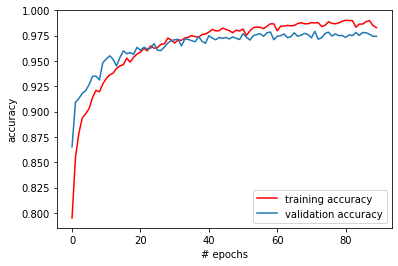

In [ ]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
Y_pred = new_model.predict_generator(test_data) 
y_pred = np.argmax(Y_pred,  axis =1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


1.0
4352
4352
[[2051   32]
 [  11 2258]]
Classification_Report
              precision    recall  f1-score   support

         neg       0.99      0.98      0.99      2083
         pos       0.99      1.00      0.99      2269

    accuracy                           0.99      4352
   macro avg       0.99      0.99      0.99      4352
weighted avg       0.99      0.99      0.99      4352



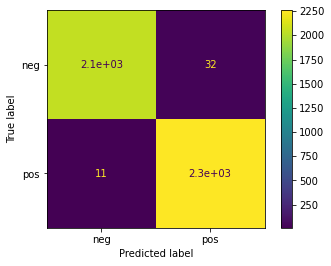

In [ ]:
#print(type(y_pred))
true_lables=[]
target_names = ['neg', 'pos']
label_names = [0 , 1]
print(test_target[0][0])
print(len(test_target))
for item in range(len(test_target)):
  true_lables.append(test_target[item][1])
print(len(true_lables))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true_lables,  y_pred,  labels = label_names) 
 
# print ('Confusion Matrix') 
print(confusion_matrix(true_lables,  y_pred))
 
print('Classification_Report') 
print(classification_report(true_lables,  y_pred, target_names = target_names)) 
 
disp = ConfusionMatrixDisplay(confusion_matrix = cm,  display_labels = target_names)
disk = disp.plot() 
plt.show()

In [ ]:
print(new_model.evaluate(test_data,test_target))

136/136 [==============================] - 6s 13ms/step - loss: 0.0424 - accuracy: 0.9901
[0.042407866567373276, 0.990119457244873]


In [ ]:
model=load_model('/content/drive/MyDrive/data/weights.best45.hdf5')
label_dict={0:'Covid19 Negative', 1:'Covid19 Positive'}

In [ ]:
img_path = '/content/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg'
#model='/content/drive/MyDrive/3layer/3layer.hdf5'
model = '/content/drive/MyDrive/data/weights.best70.hdf5'
label_dict={0:'Covid19 Negative', 1:'Covid19 Positive'}
img_size = 100
img = cv2.imread(img_path)
gray = cv2.cvtColor(np.float32(img), cv2.COLOR_RGB2GRAY)
resized = cv2.resize(gray ,(img_size , img_size) )
data_array = np.array(resized)/255
data = resized.reshape(-1,img_size,img_size,1)
model_loded = models.load_model(model)
predectied = model_loded.predict(data)
result=np.argmax(predectied,axis=1)[0]
accuracy=float(np.max(predectied,axis=1)[0])
label=label_dict[result]
 
 
print('label' , label)
print('result' , result)
print('accuracy' , accuracy)

TypeError: ignored

In [ ]:
class Test:
 
  def test_img(self , img_path):
    self.img_path = img_path
    model='/content/drive/MyDrive/3layer/3layer.hdf5'
    label_dict={0:'Covid19 Negative', 1:'Covid19 Positive'}
    img_size = 100
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(np.float32(img), cv2.COLOR_RGB2GRAY)
    resized = cv2.resize(gray ,(img_size , img_size) )
    data_array = np.array(resized)/255
    data = resized.reshape(-1,img_size,img_size,1)
    model_loded = models.load_model(model)
    predectied = model_loded.predict(data)
    result=np.argmax(predectied,axis=1)[0]
    accuracy=float(np.max(predectied,axis=1)[0])
    label=label_dict[result]
    print('label' , label)
    print('result' , result)
    print('accuracy' , accuracy)

In [ ]:
a=Test()
v=a.test_img('/content/IMG_20210724_011342_965.jpg')
print(v)

label Covid19 Negative
result 0
accuracy 0.9999896287918091
None


In [ ]:
 Y_val_pred = model.predict(test_data)
print(Y_val_pred)

[[0.0000000e+00 1.0000000e+00]
 [1.0000000e+00 2.6506644e-10]
 [9.9999988e-01 7.3294821e-08]
 ...
 [7.0757924e-05 9.9992919e-01]
 [1.3058401e-04 9.9986935e-01]
 [7.4811641e-04 9.9925190e-01]]


In [ ]:
 accuracy_score(np.argmax(test_target, axis=1), np.argmax(Y_val_pred, axis=1))

In [ ]:
 # Shuffle test data
s = np.arange(X_test.shape[0])
np.random.shuffle(s)
X_test = X_test[s]
Y_test = Y_test[s]

In [ ]:
 Y_pred = model.predict(X_test)

In [ ]:
 tta_steps = 10
predictions = []
 
for i in tqdm(range(tta_steps)):
    preds = model.predict_generator(train_generator.flow(X_test, batch_size=BATCH_SIZE, shuffle=False),
                                    steps = len(X_test)/BATCH_SIZE)
    
    predictions.append(preds)
    gc.collect()
    
Y_pred_tta = np.mean(predictions, axis=0)

In [ ]:
 from sklearn.metrics import confusion_matrix
 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
 
cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))
 
cm_plot_label =['benign', 'malignant']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for Skin Cancer')

In [ ]:
 cm = confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred_tta, axis=1))
 
cm_plot_label =['benign', 'malignant']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix for Skin Cancer')

In [ ]:
 from sklearn.metrics import classification_report
classification_report( np.argmax(Y_test, axis=1), np.argmax(Y_pred_tta, axis=1))

In [ ]:
Y_pred = model.predict_generator(test_data, steps=4500 // batchsize+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_data.classes, y_pred))
print('Classification Report')
target_names = test_data.classes
class_labels = list(test_data.class_indices.keys())   
report = classification_report(target_names, y_pred, target_names=class_labels)
print(report)

NameError: ignored